<a href="https://colab.research.google.com/github/pahalvikram/EDA-on-Hotel-Booking/blob/main/EDA_1st_Capstone_Project_Hotel_Booking_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns

In [ ]:
hotel_booking_status = '/content/drive/MyDrive/Hotel Bookings.csv'

# **let us read our data first**

In [ ]:
df=pd.read_csv(hotel_booking_status)

In [ ]:
df.shape

(119390, 32)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# First we try to understand the meaning of all columns in the dataframe



In [ ]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
df['is_canceled'].unique()

array([0, 1])

In [ ]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [ ]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [ ]:
df['required_car_parking_spaces'].unique()  

array([0, 1, 2, 8, 3])

**Data cleaning**
# Data cleaning is a mandatory step before starting the EDA project.
While cleaning data we will perform the following steps:1) Handling missing values.2)Remove duplicate rows and columns.3) Adding missing columns

In [ ]:
df[df.duplicated()].shape

(31994, 32)

Step 1: Removing duplicate rows.


In [ ]:
# Drop these duplicate values
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(87396, 32)

Step2: Handling the missing value.


In [ ]:
# Columns having missing values.
df.isnull().sum().sort_values(ascending = False)[:5]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
dtype: int64

Since company and agent, columns have company numbers and agent numbers as data. There are some  customer they didn't go with any agent or any company. So that in this case values can be null under these columns. We going to replace null values with 0.


In [ ]:
df[['company','agent']] = df[['company','agent']].fillna(0)

In [ ]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [ ]:
# Checking if all null values are removed
df.isnull().sum().sort_values(ascending = False)[:6]

country               452
children                4
hotel                   0
agent                   0
reserved_room_type      0
assigned_room_type      0
dtype: int64

some rows with total number of adults, children or babies equal to zero. So we will remove such rows.



In [ ]:
df[df['adults']+df['babies']+df['children'] == 0].shape


(166, 32)

In [ ]:
df.drop(df[df['adults']+df['babies']+df['children'] == 0].index, inplace = True)

 We are going to replace the null values under this children column with 
mean of children.

In [ ]:
df['children'].fillna(df['children'].mean(), inplace = True)

Datatype of column has string. We will replacing the missing value with 

*   List item
*   List item

the mode of country column.

In [ ]:
df['country'].fillna('others', inplace = True)

**Step 3: Adding missing columns.**

In [ ]:
# we are adding total staying days in hotels
df['total_stay'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']

In [ ]:
# And adding total num of people as column 'total_people'.
df['total_people'] = df['adults']+df['children']+df['babies']

In [ ]:
num_df = df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]

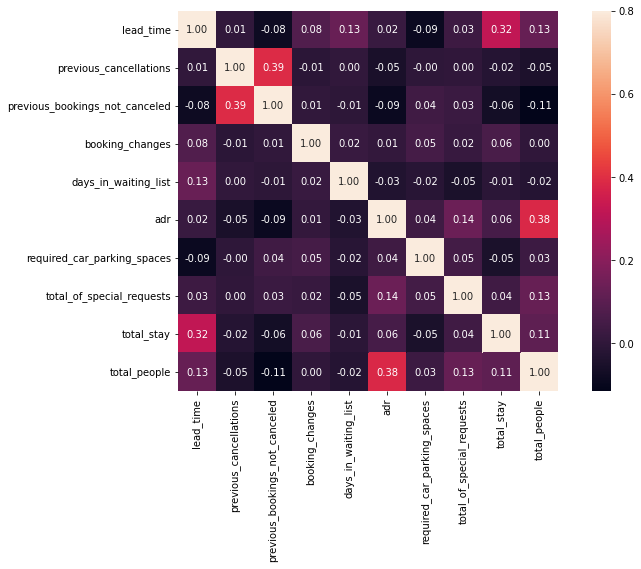

In [ ]:
#correlation with matrix
corrmat = num_df.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

1) adr is slightly correlated with total_people, which makes sense as more no. of people means more revenue, therefore more adr.     



# Q1) parking comparison between resort and city hotel?




In [ ]:
resort_hotel = df[df['hotel']== 'Resort Hotel']

Text(0.5, 1.0, 'car parking spaces in city hotel')

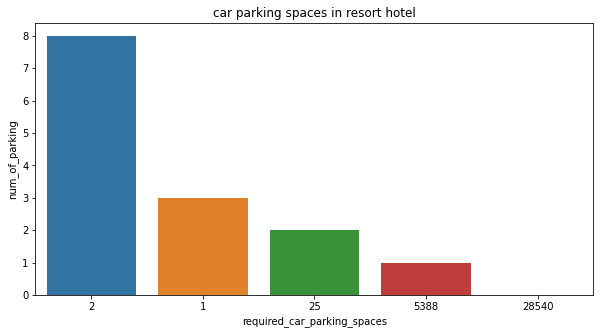

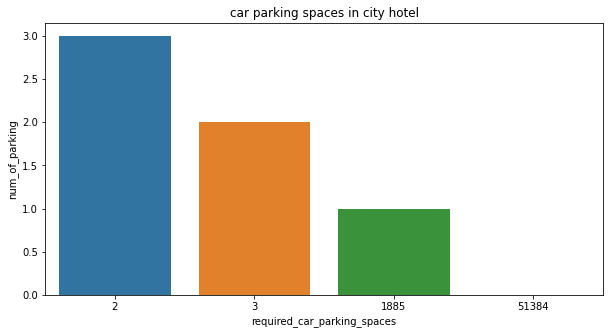

In [ ]:
Ag = pd.DataFrame(resort_hotel['required_car_parking_spaces'].value_counts()).reset_index().rename(columns = {'index':'num_of_parking'})
Ag.drop(Ag[Ag['required_car_parking_spaces'] == 0].index, inplace = True)           
plt.figure(figsize = (10,5))                                                
sns.barplot(x = 'required_car_parking_spaces', y = 'num_of_parking', data = Ag, order = Ag.sort_values('num_of_parking', ascending = False).required_car_parking_spaces)
plt.title('car parking spaces in resort hotel')

city_hotel = df[df['hotel']== 'City Hotel']
Ag = pd.DataFrame(city_hotel['required_car_parking_spaces'].value_counts()).reset_index().rename(columns = {'index':'num_of_parking'})
Ag.drop(Ag[Ag['required_car_parking_spaces'] == 0].index, inplace = True)            
Ag = Ag[:10]                                                 
plt.figure(figsize = (10,5))
sns.barplot(x = 'required_car_parking_spaces', y = 'num_of_parking', data = Ag, order = Ag.sort_values('num_of_parking', ascending = False).required_car_parking_spaces)
plt.title('car parking spaces in city hotel')


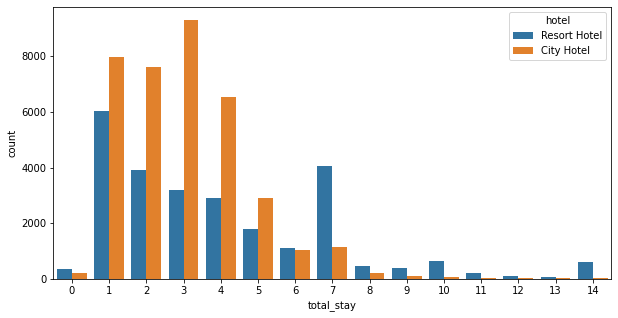

In [ ]:
not_canceled = df[df['is_canceled'] == 0]
s1 = not_canceled[not_canceled['total_stay'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = s1['total_stay'], hue = s1['hotel'])
plt.show()

we can see that the parking is very high in resort hotels as compared to city hotels. so  long stay is very high in resort hotels as compare to city hotels.

Generally stay length is less than 4 days and people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.




# Q2)let us see that which month generates high revenue.

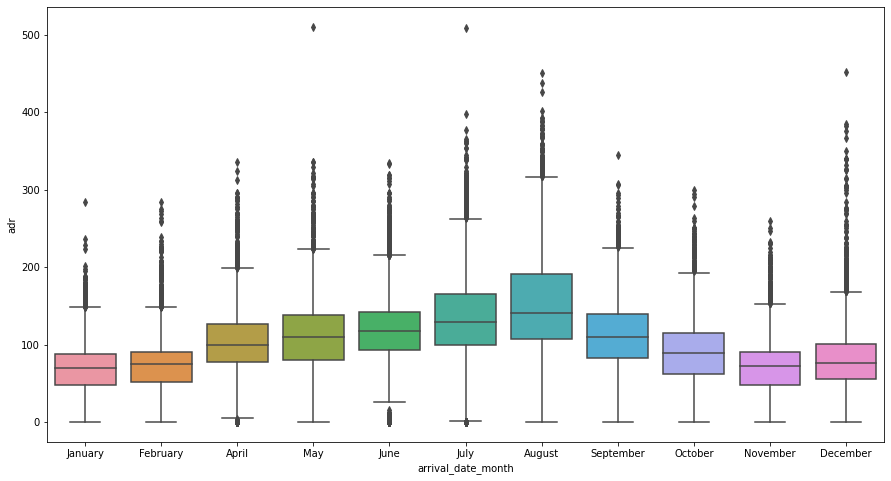

In [ ]:
reindex = ['January', 'February','April','May','June','July','August','September','October','November','December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'],categories=reindex,ordered=True)
plt.figure(figsize = (15,8))
sns.boxplot(x = df['arrival_date_month'],y = df['adr'])
plt.show()

Avg adr rises from beginning of year upto middle of year but reaches peak at August and then lowers to the end of the year.



Now let us check avg adr for each day of month.

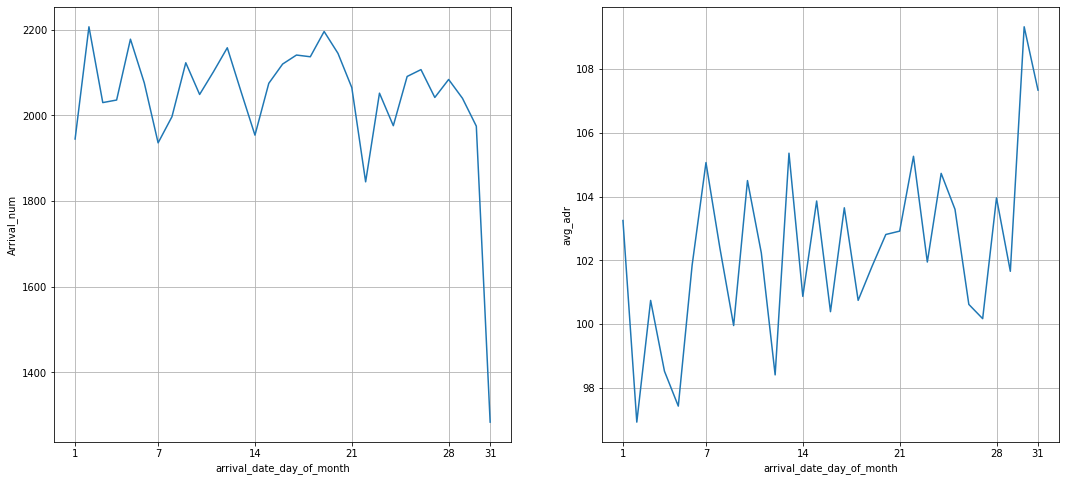

In [ ]:
d6 = pd.DataFrame(not_canceled.groupby('arrival_date_day_of_month').size()).rename(columns = {0:'Arrival_num'})
d6['avg_adr'] = not_canceled.groupby('arrival_date_day_of_month')['adr'].agg(np.mean)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plotting arrival num for each day of month
g = sns.lineplot(ax = axes[0],x = d6.index, y = d6['Arrival_num'])
g.grid()
g.set_xticks([1,7,14,21,28,31])
g.set_xticklabels([1,7,14,21,28,31])

# Plotting avg adr for each day of month
h = sns.lineplot(ax = axes[1],x = d6.index, y = d6['avg_adr'])
h.grid()
h.set_xticks([1,7,14,21,28,31])
h.set_xticklabels([1,7,14,21,28,31])

plt.show()

The graph Arrival_num has small peaks at regular interval of days. This can be due to increase in arrival weekend. And the avg adr tends to go up as month ends. Therefore charge more at the end of month.



Let us divide customers in deffrent categories as single, couple and family/friends. And check their booking %

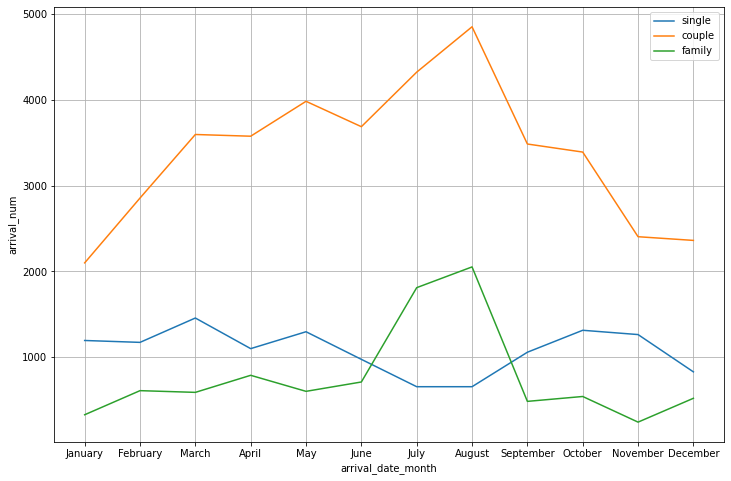

In [ ]:
single   = not_canceled[(not_canceled['adults']==1) & (not_canceled['children']==0) & (not_canceled['babies']==0)]
couple   = not_canceled[(not_canceled['adults']==2) & (not_canceled['children']==0) & (not_canceled['babies']==0)]
family   = not_canceled[not_canceled['adults'] + not_canceled['children'] + not_canceled['babies'] > 2]

reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']

fig, ax = plt.subplots(figsize=(12, 8))

for type in ['single', 'couple', 'family']:
  d1 = eval(type).groupby(['arrival_date_month']).size().reset_index().rename(columns = {0:'arrival_num'})
  d1['arrival_date_month'] = pd.Categorical(d1['arrival_date_month'],categories=reindex,ordered=True)
  sns.lineplot(data=d1, x= 'arrival_date_month', y='arrival_num', label=type, ax=ax)
  
plt.grid()
plt.show()

Singal and family both provide equal business over the year. but couples are a huge market compared to both. The sudden surge in the arrival num of couples and families in July and August. so that the most appropriate months are July and August for targeting family and couples.

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2.0
